# **Simple Linear Regression**
#### **Description:** 
Simple linear regression is a statistical technique used to establish a relationship between two variables - one independent and one dependent. The purpose of this technique is to determine whether there is a linear relationship between the two variables, and if so, to develop a mathematical model that can be used to predict the value of the dependent variable based on the value of the independent variable.
#### **Assumptions:** 
Simple linear regression is a parametric test, meaning that it makes certain assumptions about the data. These assumptions are:
1. **Homogeneity of variance:** the size of the error in our prediction doesn’t change significantly across the values of the independent variable.
2. **Independence of observations:** the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.
3. **Normality:** The data follows a normal distribution.

#### **How to perform a Simple Linear Regression:**
**Simple linear regression Formula:**
$$ y = {\beta_0} + {\beta_1{X}} + {\epsilon} $$
* y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).
* B0 is the intercept, the predicted value of y when the x is 0.
* B1 is the regression coefficient or slope – how much we expect y to change as x increases.
* x is the independent variable ( the variable we expect is influencing y).
* e is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

Linear regression finds the line of best fit line through your data by searching for the regression coefficient (B1) that minimizes the total error (e) of the model.

## **Simple Linear Regression Project:** 
### **Predicting Average Temperature in Northern Hemisphere based on Latitude using Simple Linear Regression**
#### **Project Description:**
The relationship between latitude and temperature is a well-established phenomenon in climatology. In general, temperature decreases as we move away from the equator towards the poles. This is because the Earth's surface receives more direct sunlight near the equator than at the poles, and therefore the equator is warmer.

The project of predicting average temperature based on latitude using simple linear regression is an exciting machine learning endeavor that has many real-world applications. The goal of this project is to build a model that can accurately estimate the average temperature of a particular location based on its latitude information.

### **01. Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

### **02. Reading the CSV File with Pandas**

In [2]:
# Defining the path of the csv
csv_path = "D:\Coding\Git Repository\Data-Science-Bootcamp-with-Python\Datasets\GlobalLandTemperaturesByCity.csv"

In [3]:
# Reading the csv file with pandas library
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1881-01-01,7.858,0.962,Nuevo Laredo,United States,28.13N,99.09W
1,1,1962-09-01,21.115,0.309,Musoma,Tanzania,0.80S,34.55E
2,2,1841-09-01,11.590,1.466,Lyubertsy,Russia,55.45N,36.85E
3,3,1972-06-01,24.751,0.386,João Pessoa,Brazil,7.23S,34.86W
4,4,1915-04-01,26.726,0.935,Carmen,Mexico,18.48N,91.27W


In [4]:
# Checking the shape of the dataframe
df.shape

(20000, 8)

### **03. Data Cleaning**

#### **3.01 Removing the Rows with Missing Values**

In [5]:
# Counting the number of missing values (i.e., NaN values) in each column of the pandas DataFrame
df.isnull().sum()

Unnamed: 0                       0
dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [6]:
# Dropping the rows with missing values
df.dropna(inplace=True)
# Checking the shape of the dataframe after dropping rows with missing values
df.shape

(20000, 8)

In [7]:
# Checking the dataframe after dropping the rows with missing values
df.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1881-01-01,7.858,0.962,Nuevo Laredo,United States,28.13N,99.09W
1,1,1962-09-01,21.115,0.309,Musoma,Tanzania,0.80S,34.55E
2,2,1841-09-01,11.590,1.466,Lyubertsy,Russia,55.45N,36.85E
3,3,1972-06-01,24.751,0.386,João Pessoa,Brazil,7.23S,34.86W
4,4,1915-04-01,26.726,0.935,Carmen,Mexico,18.48N,91.27W


#### **3.02 Manipulating the 'Latitude' Column**

In [8]:
# Adding a "-" (minus) before the latitudes of the sothern hemisphere
df["Latitude"] = df["Latitude"].apply(lambda x: "-"+x if x.endswith("S") else x)

In [9]:
# Removing the 'N' and 'S' from 'Latitude' column
df["Latitude"] = df["Latitude"].str.replace("N", "")
df["Latitude"] = df["Latitude"].str.replace("S", "")

In [10]:
# Checking the dataframe
df.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1881-01-01,7.858,0.962,Nuevo Laredo,United States,28.13,99.09W
1,1,1962-09-01,21.115,0.309,Musoma,Tanzania,-0.80,34.55E
2,2,1841-09-01,11.590,1.466,Lyubertsy,Russia,55.45,36.85E
3,3,1972-06-01,24.751,0.386,João Pessoa,Brazil,-7.23,34.86W
4,4,1915-04-01,26.726,0.935,Carmen,Mexico,18.48,91.27W


####  **3.03 Changing the Datatype of the 'Latitude' Column**

In [11]:
# Changing the datatype of the 'Latitude' column from 'str' to 'float'
convert_dict = {"Latitude": float}
df = df.astype(convert_dict)
df.dtypes

Unnamed: 0                         int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                         float64
Longitude                         object
dtype: object

In [12]:
# Checking the latitudes of the southern hemisphere
df[df["Latitude"] < 0].head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1,1,1962-09-01,21.115,0.309,Musoma,Tanzania,-0.80,34.55E
3,3,1972-06-01,24.751,0.386,João Pessoa,Brazil,-7.23,34.86W
8,8,1965-07-01,20.737,0.402,Bukavu,Congo (Democratic Republic Of The),-2.41,28.13E
14,14,1943-06-01,22.852,0.513,Toliary,Madagascar,-23.31,42.82E
19,19,1985-06-01,15.466,0.427,Ferraz De Vasconcelos,Brazil,-23.31,46.31W


#### **3.04 Selecting the Northern Latitudes Only**

In [13]:
# Selecting the latitudes of the Northern Hemisphere only
df = df[df["Latitude"] >= 0]

#### **3.05 Selecting a Random Sample from the DataFrame**

In [14]:
# Selecting a random sample from the dataframe
df = df.sample(10000, random_state=0)

In [15]:
# Selecting only two columns 'Latitude' and 'AverageTemperature' from the dataframe
df = df[["Latitude", "AverageTemperature"]]

#### **3.06 Removing the Outliers**

Text(0.5, 1.0, 'Boxplot before Outliers Removal')

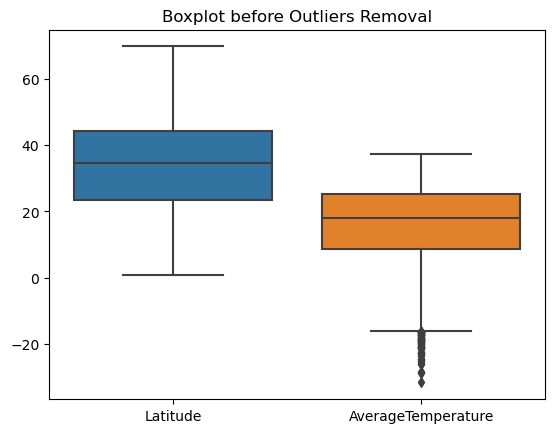

In [16]:
# Visualizing the boxplot of the dataframe
sns.boxplot(df)
plt.title("Boxplot before Outliers Removal")

In [17]:
# Removing the outliers from the 'AverageTemperature' column
# Getting the value of First and Third Quartile (Q1 & Q3) of the 'AverageTemperature'
Q1 = df["AverageTemperature"].quantile(0.25)
Q3 = df["AverageTemperature"].quantile(0.75)
print("Quartile1:", Q1)
print("Quartile2:", Q3)

Quartile1: 8.628
Quartile2: 25.2815


In [18]:
# Calulating the Inter Quartile Range (IQR)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 16.6535


In [19]:
# Calculating the Higher Fence and Lower Fence
lower_fence =  Q1 - (1.5 * IQR)
higher_fence = Q3 + (1.5 * IQR)
print("Lower Fence:", lower_fence)
print("Higher Fence:", higher_fence)

Lower Fence: -16.35225
Higher Fence: 50.261750000000006


In [20]:
# Removing the Outliers
df = df[~((df["AverageTemperature"] < lower_fence) | (df["AverageTemperature"] > higher_fence))]

#### **3.07 Checking the Final DataFrame**

In [21]:
df.shape

(9927, 2)

In [22]:
# Resetting the index of the dataframe
df.reset_index(drop=True, inplace=True)

In [23]:
# Checking the dataframe
df.head()

,Latitude,AverageTemperature
0,32.95,20.134
1,36.17,12.346
2,47.42,-0.779
3,36.17,15.944
4,40.99,0.793


In [24]:
# Describing the univariate statistics of the dataframe
df.describe()

,Latitude,AverageTemperature
count,9927.000000,9927.000000
mean,33.014089,16.345360
std,14.580933,10.448532
min,0.800000,-16.335000
25%,23.310000,8.856500
50%,34.560000,18.094000
75%,44.200000,25.317500
max,69.920000,37.283000


### **04. Data Visualization**

#### **4.01 Histogram of Average Temperature with Kernel Density Estimation (KDE))**

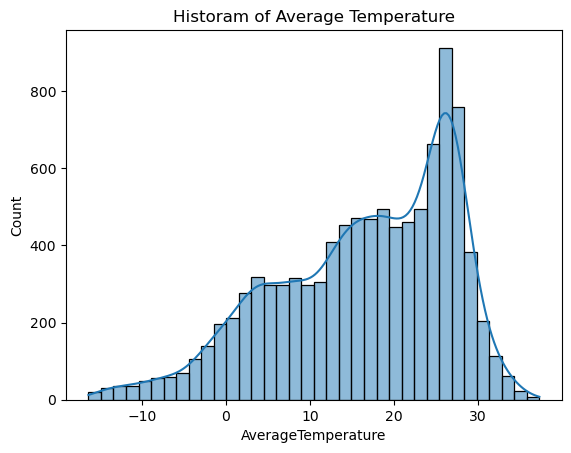

In [25]:
# Visualizing Histogram of 'AverageTemperature' with Probability Density Function
sns.histplot(df["AverageTemperature"], kde=True)
plt.title("Historam of Average Temperature")
plt.show()

#### **4.02 Boxplot of Average Temperature**

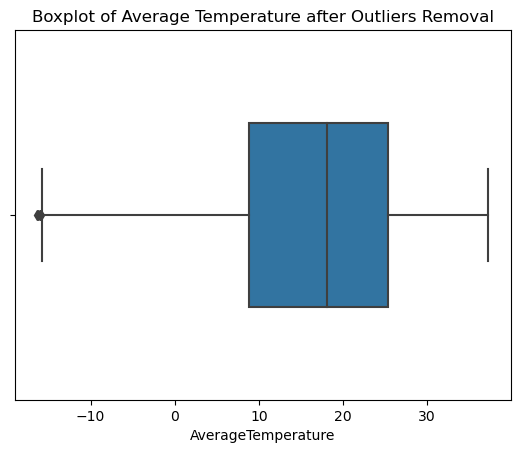

In [26]:
# Visualizing 5 number summary of the 'AverageTemperature'
sns.boxplot(x=df["AverageTemperature"], width=0.5)
plt.title("Boxplot of Average Temperature after Outliers Removal")
plt.show()

#### **4.03 Scatterplot between Latitude and Average Temperature**

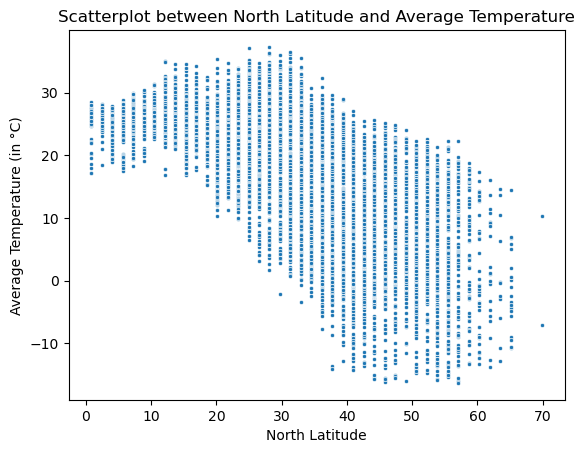

In [27]:
sns.scatterplot(x=df["Latitude"], y=df["AverageTemperature"], marker=".")
plt.title("Scatterplot between North Latitude and Average Temperature")
plt.xlabel("North Latitude")
plt.ylabel("Average Temperature (in °C)")
plt.show()

### **05. Dividing the Data into Trainining and Testing Set**

#### **5.01 Defining the Dependent and Independent Variable**

In [28]:
# Dependent Variable (y) = 'AverageTemperature'
# Independent Variable (x) = 'Latitude'
x = df[["Latitude"]]
y = df[["AverageTemperature"]]

#### **5.02 Splitting the Data into Training and Testing Set**

In [29]:
# Importing the tarin_test_split from sklearn library
from sklearn.model_selection import train_test_split

In [30]:
# Training Data = 70% and Testing Data = 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=75)

### **06. Instantiating the Simple Linear Regression Model**

#### **6.01 Importing LinearRegression Model from sklearn Library**

In [31]:
# Importing the Linear Regression Model from sklearn library
from sklearn.linear_model import LinearRegression

#### **6.02 Generating a LinearRegression Object**

In [32]:
# Creating a linear regression object
lin_reg = LinearRegression()
# Feeding the training data to the model
lin_reg.fit(x_train, y_train)

LinearRegression()

#### **6.03 Getting the Coefficients of the Linear Regression Model**

In [33]:
# Getting the slope of the model
lin_reg.coef_

array([[-0.48602283]])

In [34]:
# Getting the y-intercept of the model
lin_reg.intercept_

array([32.37125607])

### **07. Validation of the Model**

#### **7.01 Importing Some Validation Metrics**

In [35]:
# Importing some validation metrics from sklearn library
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

#### **7.02 Validating the Linear Regression Model**

In [36]:
# Predicting the AverageTemperature of the x_test (Latitude) data
y_predicted = lin_reg.predict(x_test)

In [37]:
# Defining the actual 'Average Temperature' data
y_actual = y_test

#### **7.03 Calculating the Mean Absolute Error, Mean Squared Error of the Model**

In [38]:
# Calculating the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_actual, y_predicted)
print("Mean Absolute Error (MAE):", MAE.round(4))

Mean Absolute Error (MAE): 6.0816


In [39]:
# Calulating the Mean Squared Error (MSE)
MSE = mean_squared_error(y_actual, y_predicted)
print("Mean Squared Error (MSE):", MSE.round(4))

Mean Squared Error (MSE): 57.4893


In [40]:
# Calulating the Root Mean Squared Error (MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):", RMSE.round(4))

Root Mean Squared Error (RMSE): 7.5822


#### **7.04 Plotting the Linear Regression Line**

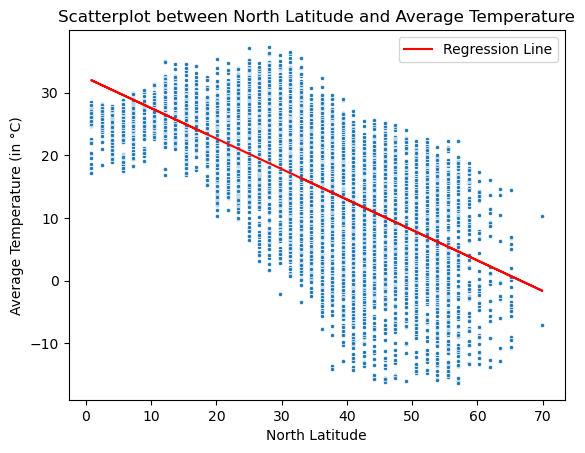

In [41]:
sns.scatterplot(x=df["Latitude"], y=df["AverageTemperature"], marker=".")
plt.plot(x, lin_reg.predict(x), color="red", label="Regression Line")
plt.title("Scatterplot between North Latitude and Average Temperature")
plt.xlabel("North Latitude")
plt.ylabel("Average Temperature (in °C)")
plt.legend()
plt.show()